# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [86]:
#Import all the necessary modules
import numpy as np # Linear Algebra
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
from matplotlib import pyplot as plt # Data Visualization
import scipy.stats as stats # Data computing

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [87]:
Diabetes_Df = pd.read_csv('Diabetes.csv', sep=',') 

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [88]:
Diabetes_Df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

# Q3 Print the datatypes of each column and the shape of the dataset 

In [92]:
Diabetes_Df.shape # No of rows and no of columns

(768, 9)

In [93]:
Diabetes_Df.dtypes 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [94]:
Diabetes_Df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### We have columns where min value is zero indicating zero value in that column. Glucose, BP, SkinThickness, Insulin, BMI are columns where zero value does not make sense and incorrect in the data.

In [95]:
colnames = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # List the five columns

for col in colnames:
    Diabetes_Df[col].replace(0,Diabetes_Df[col].median(),inplace = True) # replace zero value with median

# Q5 Print the descriptive statistics of each & every column using describe() function

In [96]:
Diabetes_Df.describe() # recheck min value

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [97]:
Diabetes_Df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

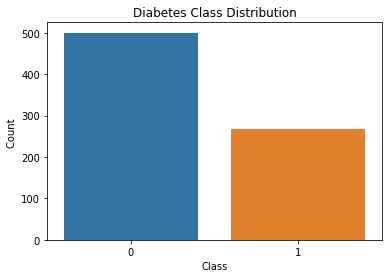

In [103]:
sns.barplot(Diabetes_Df['Outcome'].value_counts().index, Diabetes_Df['Outcome'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count ')
plt.title('Diabetes Class Distribution')
plt.show()

#### Inference: We have more records who are non-diabetic compared to diabetic patient

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

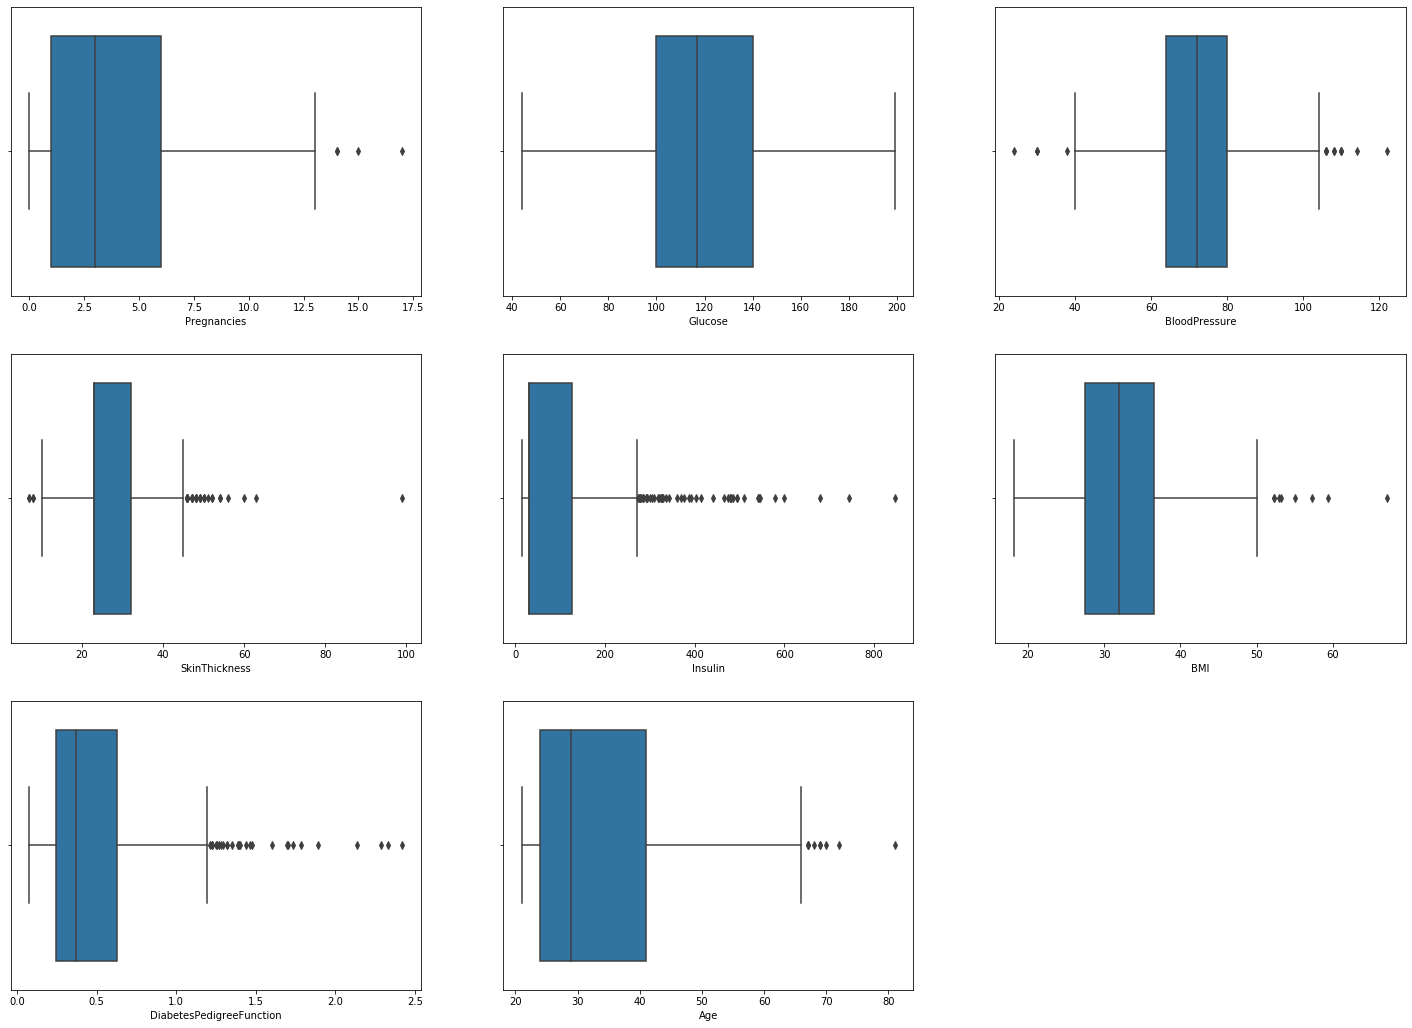

In [104]:
plt.figure(figsize=(25,50))
plt.subplot(8,3,1)
sns.boxplot(x = Diabetes_Df.Pregnancies)
plt.xlabel('Pregnancies')
plt.subplot(8,3,2)
sns.boxplot(x = Diabetes_Df.Glucose)
plt.xlabel('Glucose')
plt.subplot(8,3,3)
sns.boxplot(x = Diabetes_Df.BloodPressure)
plt.xlabel('BloodPressure')
plt.subplot(8,3,4)
sns.boxplot(x = Diabetes_Df.SkinThickness)
plt.xlabel('SkinThickness')
plt.subplot(8,3,5)
sns.boxplot(x = Diabetes_Df.Insulin)
plt.xlabel('Insulin')
plt.subplot(8,3,6)
sns.boxplot(x = Diabetes_Df.BMI)
plt.xlabel('BMI')
plt.subplot(8,3,7)
sns.boxplot(x = Diabetes_Df.DiabetesPedigreeFunction)
plt.xlabel('DiabetesPedigreeFunction')
plt.subplot(8,3,8)
sns.boxplot(x = Diabetes_Df.Age)
plt.xlabel('Age')
plt.show()
#Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,DiabetesPedigreeFunction, Age

#### Inference: Skin Thickness, Insulin, DiabetesPedigree, Age columns are highly right skewed and we have outliers too, this assymetric attributes can impact model building and will perform poorly.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [105]:
Diabetes_Df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

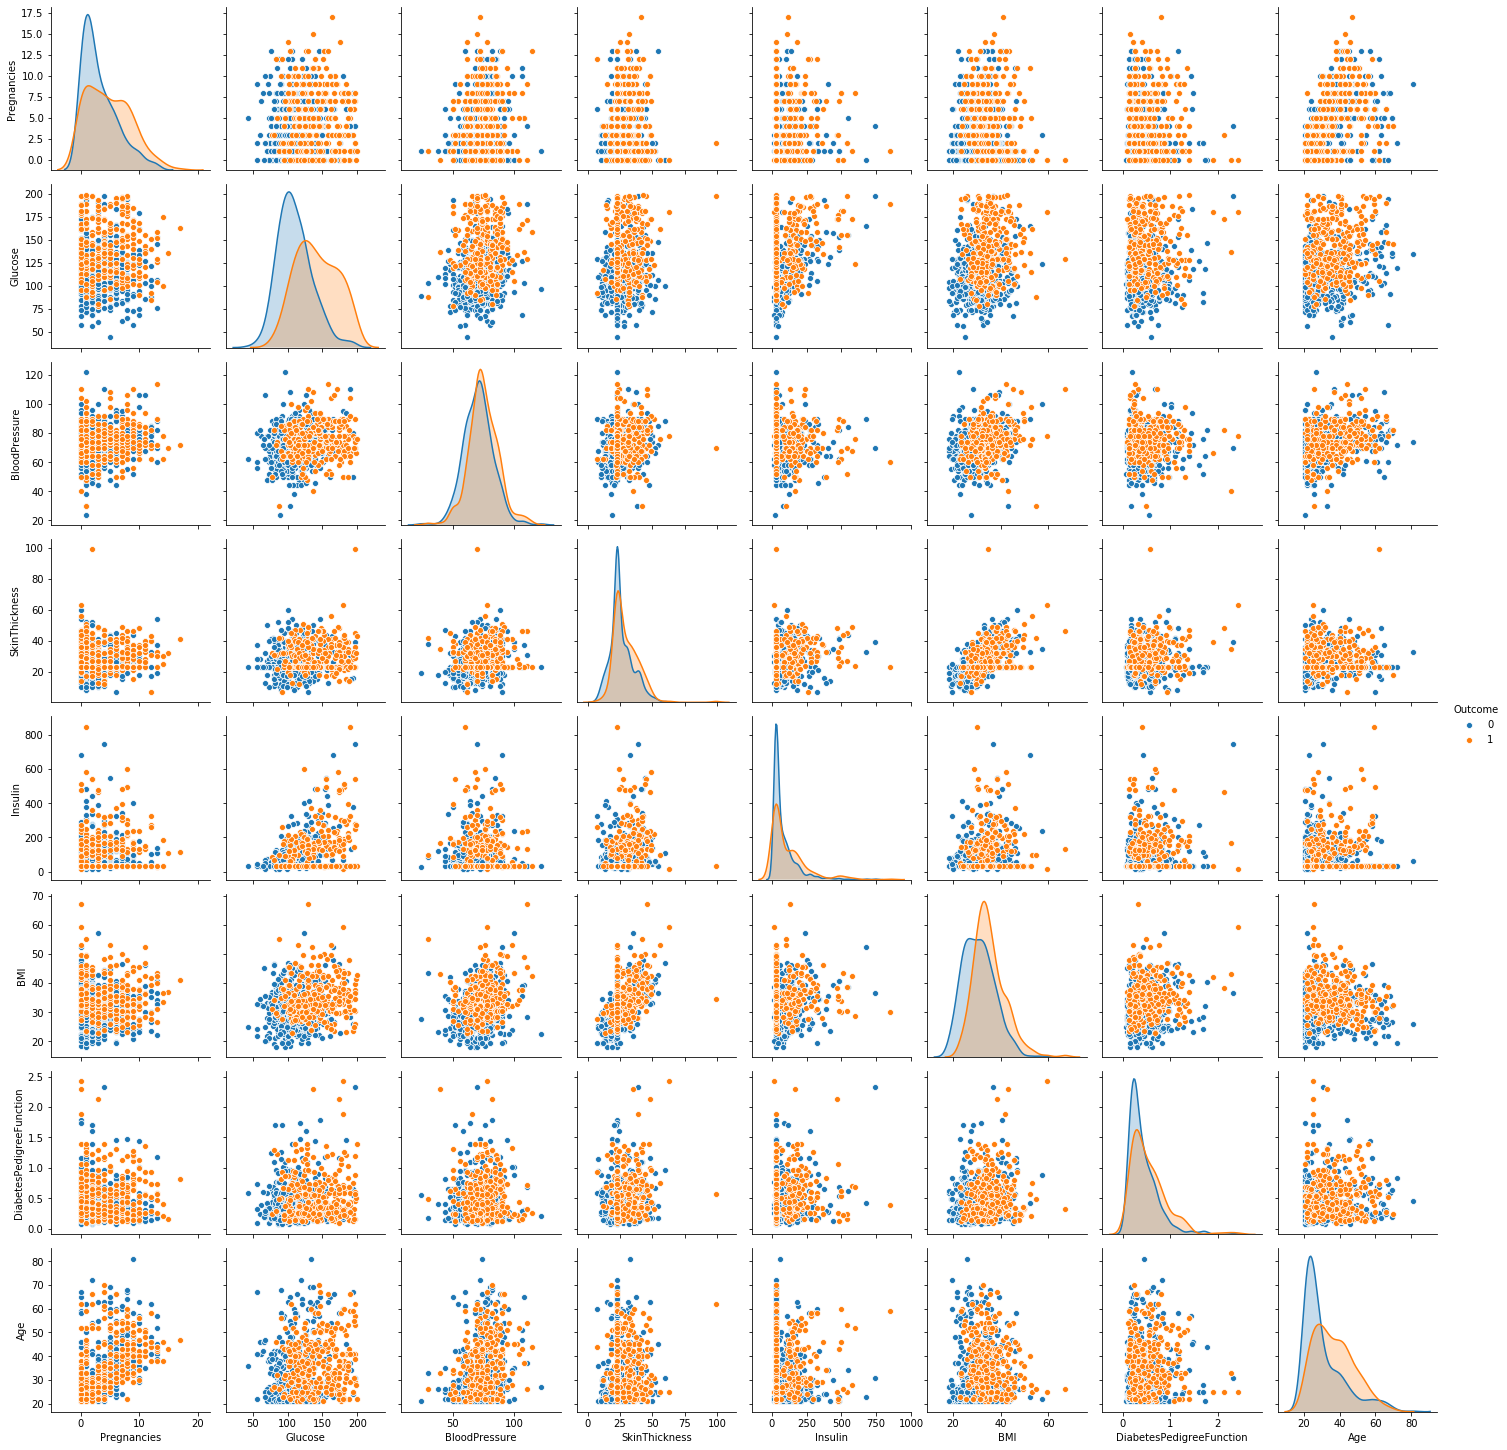

In [108]:
sns.pairplot(Diabetes_Df, hue = 'Outcome', diag_kind = 'kde')

#### Inference: All the attributes are weakly correlated.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [110]:
from sklearn.model_selection import train_test_split
X = Diabetes_Df.drop('Outcome', axis = 1)
y = Diabetes_Df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [111]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [112]:
from sklearn.metrics import accuracy_score
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
print('\033[1mUsing Decision Tree Classifier:')
print('Accuracy Score for Test Dataset : %0.3f' % accuracy_score(y_test, y_test_pred))
print('Accuracy Score for Train Dataset :%0.3f' % accuracy_score(y_train, y_train_pred))

Using Decision Tree Classifier:
Accuracy Score for Test Dataset : 0.736
Accuracy Score for Train Dataset :1.000


#### Inference: Accuracy score has drastically come down on test data set from 100% to 73%. This is because of overfitting as we have not used hyperparameters to tune the decision train classifier.

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[111,  35],
       [ 30,  55]], dtype=int64)

#### Inference: Of 85 diabetic patients record, DT model with full depth could predict only 55 correctly as diabetic. 

Print the feature importance of the decision model - Optional

In [113]:
pd.DataFrame({'Features':X.columns, 'Feature_Importance': dt.feature_importances_})

Features  Feature_Importance
0               Pregnancies            0.095985
1                   Glucose            0.229538
2             BloodPressure            0.160683
3             SkinThickness            0.050977
4                   Insulin            0.005543
5                       BMI            0.224464
6  DiabetesPedigreeFunction            0.098035
7                       Age            0.134777

#### Inference: Glucose , BMI, BloodPressure, Age features in order has more weightage to predict the patient as diabetic or not.

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [74]:
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
print('\033[1mUsing Random Forest Classifier:')
print('Accuracy Score for Test Dataset : %0.3f' % accuracy_score(y_test, y_test_pred))
print('Accuracy Score for Train Dataset :%0.3f' % accuracy_score(y_train, y_train_pred))

Using Random Forest Classifier:
Accuracy Score for Test Dataset : 0.792
Accuracy Score for Train Dataset :1.000


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [75]:
y_test_pred = ad.predict(X_test)
y_train_pred = ad.predict(X_train)
print('\033[1mUsing AdaBoost Classifier:')
print('Accuracy Score for Test Dataset : %0.3f' % accuracy_score(y_test, y_test_pred))
print('Accuracy Score for Train Dataset :%0.3f'% accuracy_score(y_train, y_train_pred))

Using AdaBoost Classifier:
Accuracy Score for Test Dataset : 0.784
Accuracy Score for Train Dataset :0.827



# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [70]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [72]:
y_test_pred = bg.predict(X_test)
y_train_pred = bg.predict(X_train)
print('\033[1mUsing Bagging Classifier:')
print('Accuracy Score for Test Dataset : %0.3f' % accuracy_score(y_test, y_test_pred))
print('Accuracy Score for Train Dataset :%0.3f'% accuracy_score(y_train, y_train_pred))

Using Bagging Classifier:
Accuracy Score for Test Dataset : 0.775
Accuracy Score for Train Dataset :0.983


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
y_test_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)
print('\033[1mUsing GradientBoost Classifier:')
print('Accuracy Score for Test Dataset : %0.3f' % accuracy_score(y_test, y_test_pred))
print('Accuracy Score for Train Dataset :%0.3f'% accuracy_score(y_train, y_train_pred))

Using GradientBoost Classifier:
Accuracy Score for Test Dataset : 0.784
Accuracy Score for Train Dataset :0.933


#### Inference: Accuracy score  using Gradient Boost Model is high relatively than other.